#Week 2 Assignment
##US Climate Risk Projections by County 2040 - 2049
It's important to adopt concerted and coordinated national efforts to address the threat of climate change risks. Yet a large geographic entity such as the United States will undoubtedly see different levels of hazards, exposure, and vulnerability across the different metropolitan regions. 
The analysis below illustrates projections of climate risk for different areas of the country, and the plotted map highlights the two areas with the highest climate risk.

In [128]:
import pandas as pd

In [129]:
import geopandas as gpd

In [130]:
Clim_risk = gpd.read_file('Week 2/crv-us-climate-risk-proj-county-2040-2049.shp')

In [ ]:
#what's the data type 

In [131]:
type(Clim_risk)

geopandas.geodataframe.GeoDataFrame

In [ ]:
#what does the data look like (**results**: 3108 rows, 18 columns shown below)

In [123]:
 Clim_risk.shape

(3108, 18)

In [124]:
Clim_risk.columns.to_list()

['GEOID',
 'TempChg',
 'PrepChg',
 'PrepExt',
 'ColdExt',
 'HeatExt',
 'DryChg',
 'ImpSurface',
 'HouseDen',
 'PopEst',
 'HouseSLR',
 'RoadSLR',
 'Hazard(H)',
 'Expos(E)',
 'Vulner(V)',
 'Risk=HEV',
 'HEV*100',
 'geometry']

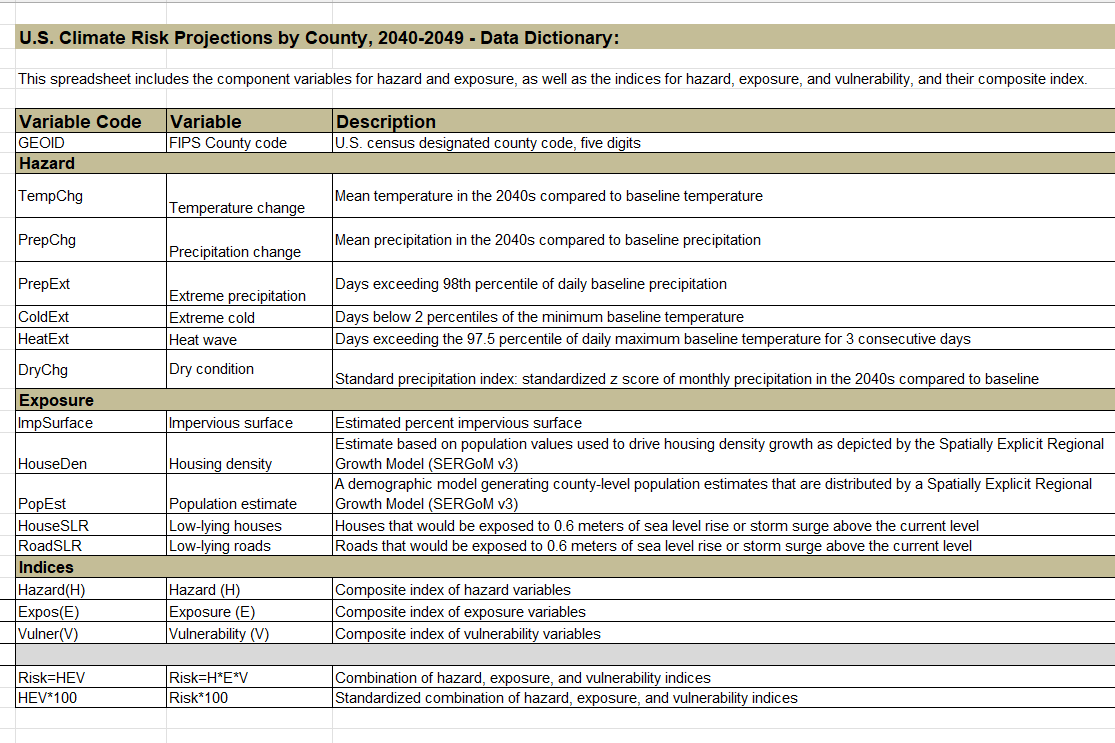

In [134]:
clim_risk_count= Clim_risk['PopEst'].value_counts()

In [ ]:
#create and show a data frame with a subset of the four desired columns

In [135]:
 desired_columns = ['GEOID','Hazard(H)','Expos(E)', 'Vulner(V)', 'HEV*100','geometry']

In [136]:
Clim_risk_trimmed = Clim_risk[desired_columns].copy()

In [137]:
print(Clim_risk_trimmed)

      GEOID  Hazard(H)  Expos(E)  Vulner(V)   HEV*100  \
0     31039   0.223508  0.005301   0.296029  0.035076   
1     53069   0.541184  0.005710   0.287844  0.088948   
2     35011   0.335316  0.000178   0.287650  0.001720   
3     31109   0.281753  0.043427   0.325646  0.398449   
4     31129   0.297213  0.003258   0.286739  0.027770   
...     ...        ...       ...        ...       ...   
3103  13123   0.261650  0.022381   0.306330  0.179390   
3104  27135   0.195794  0.003575   0.290377  0.020324   
3105  28089   0.244329  0.021526   0.279996  0.147260   
3106  48227   0.281713  0.005157   0.273766  0.039775   
3107  54099   0.278991  0.012234   0.288323  0.098411   

                                               geometry  
0     POLYGON ((-97.01952 42.00410, -97.01952 42.004...  
1     POLYGON ((-123.43639 46.23820, -123.44759 46.2...  
2     POLYGON ((-104.56739 33.99757, -104.56772 33.9...  
3     POLYGON ((-96.91075 40.78494, -96.91075 40.790...  
4     POLYGON ((-98.27367

In [ ]:
#find the rows with geometry coordinates and verify that the majority have column values (**results**: only 5 with no value) 

Clim_risk_trimmed.geometry

In [ ]:
#plot the map to show what regions have the highest combined climate risk score (HEV*100) combining the Hazard (H), Exposure (E) and Vulnerability columns/score (**results**: Coastal South West, and Coastal South East) 

<Axes: >

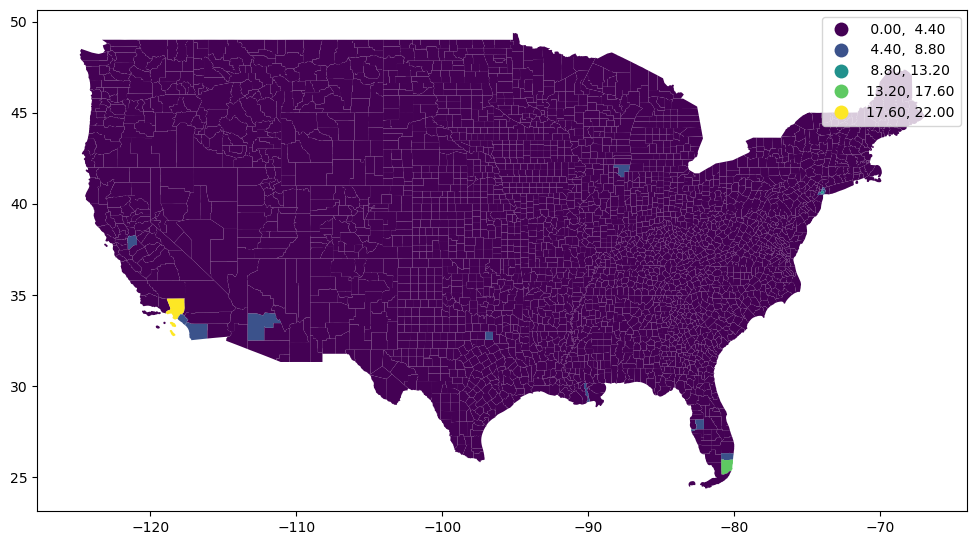

In [139]:
Clim_risk_trimmed.plot(
    figsize = (12,8),
    column = 'HEV*100',
    legend = True,
    scheme = 'equal_interval'
)

In [ ]:
#Replicate the plotting above to examine whether areas with the highest combined climate risk score - HEV*100, fall within areas(GeoID) with a population above 500,000 people (**results**: the two highest risks areas are also high population areas) 

In [140]:
Clim_risk_trimmed['HEV*100'] = Clim_risk_trimmed['HEV*100'].astype('int')

In [141]:
Clim_risk['PopEst'] = Clim_risk['PopEst'].astype('int')

Clim_risk.query("PopEst >= 500000")

<Axes: >

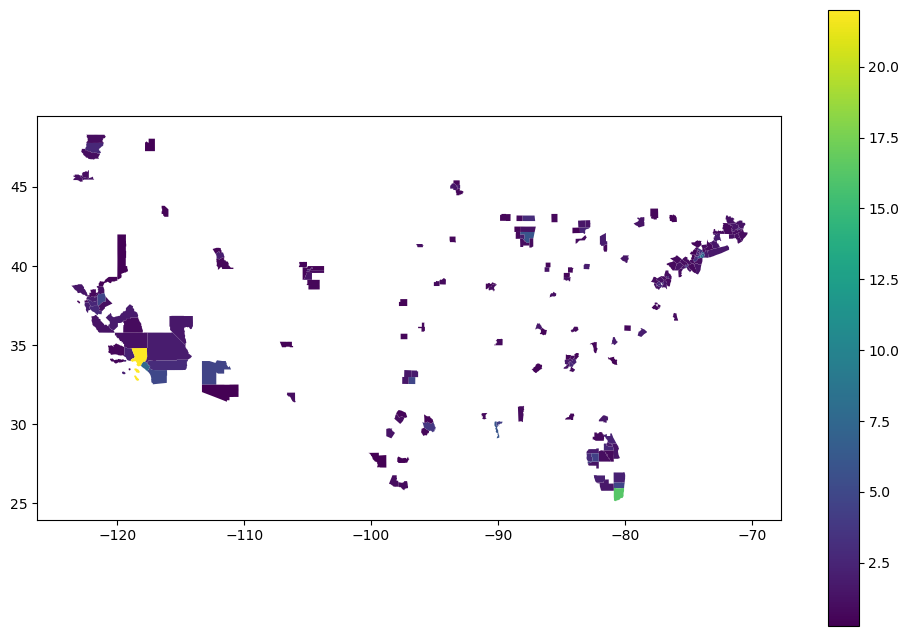

In [142]:
Clim_risk.query("PopEst >= 500000").plot(
    figsize = (12,8),
    column = 'HEV*100',
    legend = True
)